<a href="https://colab.research.google.com/github/swopnimghimire-123123/Maths_For_ML/blob/main/03_Measures_of_Spread_%26_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 3: Measures of Spread & Outliers

***

## 1. Introduction
So far we have studied central tendency (mean, median, mode).
But a single “center” value is not enough — we also need to know how **spread out** the data is.

**In this notebook, we will cover:**

- Range & Interquartile Range (IQR)
- Variance & Standard Deviation
- Detecting Outliers (using IQR & z-scores)
- Visualizing spread with boxplots

**Why it matters in ML:**

- Standard deviation measures variability, which is critical for gradient descent and optimization.
- Outliers can heavily influence models and must be detected or handled.

***

## 2. Theory

Let's dive into the theoretical concepts behind measuring data spread and identifying outliers.

### 2.1 Range

The range is the simplest measure of spread, representing the difference between the maximum and minimum values in a dataset.

\[
Range = Max - Min
\]

### 2.2 Interquartile Range (IQR)

The IQR focuses on the spread of the middle 50% of the data. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1).

- IQR = Q3 – Q1 (spread of middle 50% of data).

### 2.3 Variance & Standard Deviation

Variance and standard deviation are more robust measures of spread that consider how each data point deviates from the mean.

**Variance** measures the average of the squared differences from the mean: $Variance = \frac{\sum (x_i - \bar{x})^2}{n}$

**Standard Deviation** is the square root of the variance. It provides a measure of the typical distance of data points from the mean and is in the same units as the original data:

\[
Standard\ Deviation = \sqrt{Variance}
\]

### 2.4 Outliers

Outliers are data points that are significantly different from other data points in a dataset. Identifying and handling outliers is crucial as they can skew statistical analyses and machine learning models.

- **IQR Rule:** A point is considered an outlier if it falls below Q1 minus 1.5 times the IQR or above Q3 plus 1.5 times the IQR.

\[
x < Q1 - 1.5 \times IQR \quad \text{or} \quad x > Q3 + 1.5 \times IQR
\]

***

## 3. Code Demonstration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Sample dataset: Exam scores
np.random.seed(42)
scores = np.append(np.random.normal(70, 10, 50),[20,95]) # Added outliers
df = pd.DataFrame({'Scores': scores})
df.head()

,Scores
0,74.967142
1,68.617357
2,76.476885
3,85.230299
4,67.658466


### Finding the range of data

In [ ]:
data_range = df["Scores"].max() - df["Scores"].min()
print("Range:", data_range)

Range: 75.0


### InterQuartile Range(IQR)

In [ ]:
Q1 = df["Scores"].quantile(0.25)
Q3 = df["Scores"].quantile(0.75)

IQR = Q3 - Q1
print("Q1:", Q1, "Q3:", Q3, "IQR:", IQR)

Q1: 60.657741632754856 Q3: 73.51638221762764 IQR: 12.85864058487278


### Variance & Standard Deviation

In [ ]:
variance = df["Scores"].var()
std_dev = df["Scores"].std()
print("Variance:", variance, "Standard Deviation:", std_dev)

Variance: 142.86019051521387 Standard Deviation: 11.952413585348102


### Detect Outliers using IQR

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Scores"] < lower_bound) | (df["Scores"] > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
    Scores
50    20.0
51    95.0


### Detect Outliers using Z-score

In [ ]:
df["z_score"] = stats.zscore(df["Scores"])
outliers = df[df["z_score"].abs() > 3]
print("Outliers:")
print(outliers)

Outliers (Z-score method):
     Scores   z_score
50    20.0 -4.000296


### Boxplot Visulaization

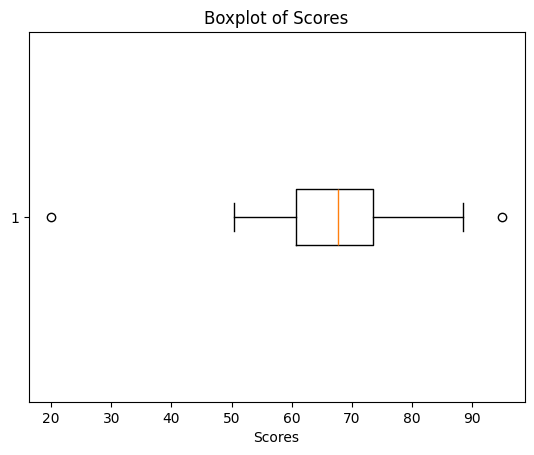

In [ ]:
plt.boxplot(df["Scores"], vert = False)
plt.xlabel("Scores")
plt.title("Boxplot of Scores")
plt.show()

4. Practice Problems

- Compute the range, IQR, variance, and std dev for this dataset:

  `[5, 7, 8, 5, 9, 12, 15, 5, 100]`

- Identify outliers using the IQR method.

- Create a boxplot of the dataset.

- Discuss: Which is more robust to outliers — variance or IQR? Why?

In [ ]:
import pandas as pd

x = [5, 7, 8, 5, 9, 12, 15, 5, 100]
df_x = pd.DataFrame(x, columns=["Values"])
df_x.head()

range = df_x["Values"].max() - df_x["Values"].min()
print("Range:", range)

IQR = df_x["Values"].quantile(0.75) - df_x["Values"].quantile(0.25)
print("IQR:", IQR)

variance = df_x["Values"].var()
print("Variance:", variance)

Range: 95
IQR: 7.0
Variance: 947.0277777777778


In [ ]:
### Identifying outliers using the IQR method.

Q1 = df_x["Values"].quantile(0.25)
Q3 = df_x["Values"].quantile(0.75)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_x[(df_x["Values"] < lower_bound) | (df_x["Values"] > upper_bound)]
print("Outliers\n")
print(outliers)

Outliers

   Values
8     100


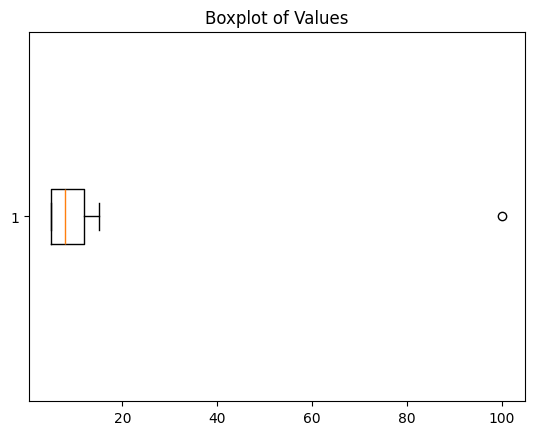

In [ ]:
### Creating a boxplot of the dataset
plt.boxplot(df_x["Values"], vert=False)
plt.title("Boxplot of Values")
plt.show()

**Discuss: Which is more robust to outliers — variance or IQR? Why?**

**IQR (Interquartile Range)** is more robust to outliers than **variance**.

Here's why:

*   **IQR** is calculated based on the quartiles (Q1 and Q3), which represent the 25th and 75th percentiles of the data. These values are not directly influenced by extreme values (outliers) in the dataset. The IQR only considers the spread of the middle 50% of the data.

*   **Variance**, on the other hand, is calculated by taking the average of the squared differences from the mean. The mean is heavily influenced by outliers, and squaring the differences further exaggerates the impact of these extreme values on the variance.

In essence, because the IQR focuses on the central portion of the data, it's less susceptible to being skewed by a few unusually large or small values, making it a more reliable measure of spread when outliers are present.